In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def split_col(col):
    return [st.split(',') for st in col]

def unlist_col(col):
    return [item for sublist in col for item in sublist]

def count_len(cell):
    try:
        cell=cell.remove('0')
        return len(cell)
    except:
        try:
            return len(cell)
        except:
            return 0
           
    
def label (row):
    if row['count'] == 0 :
        return 0
    else:
        return 1
    
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
db = client.get_database('ShebaAllergyDB')
patients=db.patients

In [4]:
data = pd.DataFrame(list(patients.find({})))
data.age=120-pd.to_numeric(data.age)
data=data.fillna(0)
data=data[(data.age<100.0) & (data.age>3)]
data=data.replace('',0)

In [5]:
data.shape

(298, 104)

## DESCRIPRTIVE

In [6]:
patient_number=data.shape[0]
patient_number

298

In [7]:
data.age.mean()

45.58724832214765

In [8]:
data.age.std()

17.66983310137321

In [9]:
sum(data.gender=='Female')

182

In [11]:
sum(data.gender=='Female')/patient_number

0.610738255033557

## DEMOGRAPHICS

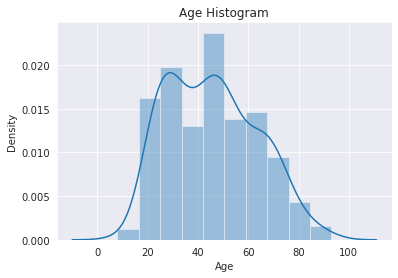

In [12]:
import seaborn as sns

sns.set_style('darkgrid')
ax=sns.distplot(data.age, norm_hist=False, kde=True)
ax.set(xlabel= "Age",ylabel='Density')
ax.set_title('Age Histogram')
plt.show()

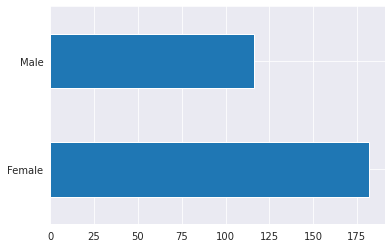

In [13]:
CountStatus = pd.value_counts(data['gender'].values, sort=True)


CountStatus.plot.barh()

## TESTS

In [14]:
data.columns

Index(['_id', 'body_parts', 'PatientID', 'month', 'year', 'age', 'gender',
       'relevance', 'duration', 'family_history',
       ...
       'plastic', 'plastic_0', 'plastic_1', 'plastic_2', 'plastic_3', 'makeup',
       'makeup_0', 'makeup_1', 'makeup_2', 'makeup_3'],
      dtype='object', length=104)

In [15]:
test_columns=['standard', 'perishable', 'cosmetics', 'plants', 'baking','perfumes','lotions','textile','shoes','acrylic',
             'dental','books','oils','metals','plastic','steroids','rubber']
len(test_columns)

17

In [16]:
test=data[test_columns]

In [23]:
l=(list(test.columns))
set([x for x in l if l.count(x) > 1])

set()

In [28]:
final=test.apply(pd.Series.value_counts)
final=final.fillna(0)
final=final.sort_values(by=final.iloc[0], axis=1, inplace=True)
# final.head()

KeyError: standard      296
perishable    295
cosmetics     293
plants          9
baking         15
perfumes        9
lotions        54
textile        48
shoes          25
acrylic        24
dental         14
books          14
oils           13
metals          9
plastic         7
steroids       45
rubber          4
Name: 1, dtype: int64

In [29]:
final.iloc[0]

standard      296
perishable    295
cosmetics     293
plants          9
baking         15
perfumes        9
lotions        54
textile        48
shoes          25
acrylic        24
dental         14
books          14
oils           13
metals          9
plastic         7
steroids       45
rubber          4
Name: 1, dtype: int64

In [31]:
l=(list(final.iloc[0]))
set([x for x in l if l.count(x) > 1])

{9, 14}

In [482]:
test.iloc[0,0]

'1'

In [32]:
test=test.astype(int)
sums=test.sum(axis=1)
sums.mean()

3.9395973154362416

In [33]:
sums.std()

0.9794397348492256

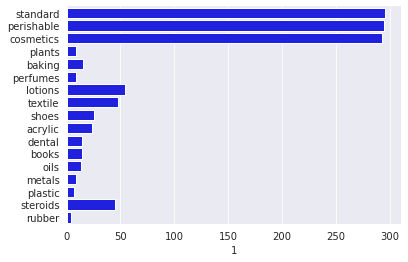

rubber          4
plastic         7
metals          9
plants          9
perfumes        9
oils           13
books          14
dental         14
baking         15
acrylic        24
shoes          25
steroids       45
textile        48
lotions        54
cosmetics     293
perishable    295
standard      296
Name: 1, dtype: int64

In [34]:


sns.barplot(y=final.columns, x=final.iloc[0],color="b")
sns.set_color_codes('pastel')
sns.despine(left = True, bottom = True)


plt.show()

(final.iloc[0]).sort_values()

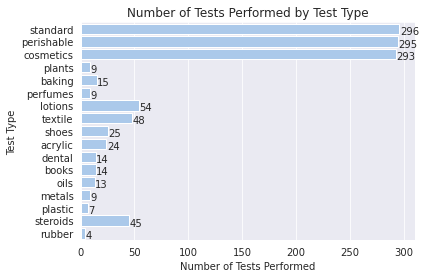

In [35]:
import numpy as np
g=sns.barplot(y=final.columns, x=final.iloc[0],color="b")
g.set(xlabel= "Number of Tests Performed",ylabel='Test Type')
g.set_title('Number of Tests Performed by Test Type')
show_values_on_bars(g, "h", 0.3)
plt.show()

## test results

In [36]:
def catch(item):
    try:
        return item[1]
    except IndexError:
        return '0'

In [37]:
result_cols=['standard_0', 'standard_1', 'standard_2', 'standard_3', 'perishable_0',
       'perishable_1', 'perishable_2', 'perishable_3', 'cosmetics_0',
       'cosmetics_1', 'cosmetics_2', 'cosmetics_3', 'plants_0', 'plants_1',
       'plants_2', 'plants_3', 'baking_0', 'baking_1', 'baking_2', 'baking_3',
        'perfumes_0', 'perfumes_1', 'perfumes_2',
       'perfumes_3',   'lotions_0', 'lotions_1',
       'lotions_2', 'lotions_3', 'textile_0', 'textile_1', 'textile_2',
       'textile_3',  'steroids_0', 'steroids_1', 'steroids_2',
       'steroids_3', 'shoes_0', 'shoes_1', 'shoes_2', 'shoes_3',
        'rubber_0', 'rubber_1', 'rubber_2', 'rubber_3', 
       'acrylic_0', 'acrylic_1', 'acrylic_2', 'acrylic_3', 
       'dental_0', 'dental_1', 'dental_2', 'dental_3',  'books_0',
       'books_1', 'books_2', 'books_3',  'oils_0', 'oils_1', 'oils_2',
       'oils_3',  'metals_0', 'metals_1', 'metals_2', 'metals_3',
        'plastic_0', 'plastic_1', 'plastic_2', 'plastic_3']

results=data[result_cols]
results.shape

(298, 68)

In [38]:
split_results=pd.DataFrame()
# result_cols=['plastic_3']
for col in result_cols:
    splitted=results[col].astype(str).str.split('--',1).tolist()
    splitted_before=[item[0] for item in splitted]
    splitted_after=[catch(item) for item in splitted]

    
    new_df=pd.DataFrame({
        f'{col}_before': splitted_before,
        f'{col}_after': splitted_after
        
    })
    split_results=pd.concat([split_results, new_df],axis=1)

In [39]:
before_cols = [col for col in split_results.columns if col.endswith('before')]
after_cols = [col for col in split_results.columns if col.endswith('after')]
before=split_results[before_cols]
after=split_results[after_cols]

In [40]:
before_splitted=before.apply(split_col, axis=0)
after_splitted=after.apply(split_col, axis=0)

In [43]:
test_counts=pd.DataFrame(columns=['test_number','count','test_type'])
time_dataframe=after_splitted

for testtype in test_columns:
    test_cols=[col for col in time_dataframe if col.startswith(testtype) ]
    cols=[time_dataframe[col] for col in test_cols]
    lists=[unlist_col(col) for col in cols]
    final=[item for sublist in lists for item in sublist]
    final_df=pd.Series(final).value_counts().reset_index().rename(columns={'index': 'test_number',0:'count'})
    final_df['test_type']=testtype
    test_counts=pd.concat([test_counts,final_df])
    
test_counts=test_counts[test_counts.test_number!='0']
test_counts=test_counts[test_counts.test_number!='']

test_counts['test_name']=test_counts.test_type + ' ' + test_counts.test_number

test_counts.sort_values(by=['count'], ascending=False)[:20]
final_counts=test_counts.sort_values(by=['count'], ascending=False)[:20]

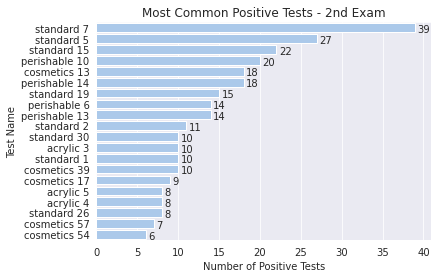

In [44]:
import numpy as np
g=sns.barplot(y='test_name', x='count',color="b", data=final_counts)
g.set(xlabel= "Number of Positive Tests",ylabel='Test Name')
g.set_title('Most Common Positive Tests - 2nd Exam')
show_values_on_bars(g, "h", 0.3)
plt.show()

## CORELATION MAP

In [45]:
cor_df=after_splitted

In [155]:

def test_result_per_row(dataframe, testtype,test_num):
    test_results=[] 
    
    for row in range(dataframe.shape[0]):
        test_cols=[col for col in dataframe if col.startswith(testtype) ]
        list_of_lists=dataframe.loc[row,test_cols]
        final=[item for sublist in list_of_lists for item in sublist]

        if test_num in final:
            result=1 
        else:
            result=0
        test_results.append(result)
    return test_results
        

In [195]:
num_materials=11
counts_df=final_counts.reset_index()

corr_df=pd.DataFrame(index=cor_df.index)

for row in range(num_materials):
    testtype=counts_df.loc[row,'test_type']
    test_num=counts_df.loc[row,'test_number']
    test_name=counts_df.loc[row,'test_name']
    g=test_result_per_row(cor_df,testtype,test_num)
    corr_df[test_name]=g

Text(0.5, 1.0, 'Positive tests correlation matrix')

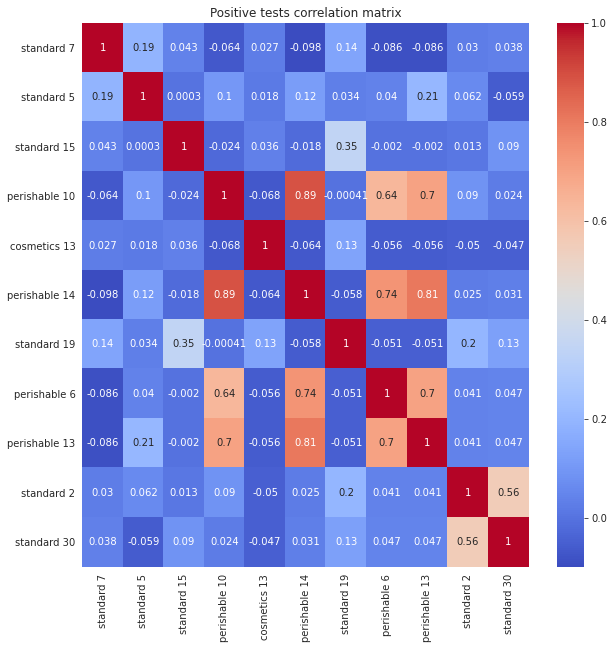

In [198]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr_df.corr(), annot = True,fmt='.2g',cmap= 'coolwarm').set_title('Positive tests correlation matrix')


## COUNT POSITIVE TEST

In [226]:
time_dataframe=before_splitted


In [228]:
len_table=time_dataframe.applymap(count_len)
len_table['PatientID']=data['PatientID'].values

patient_counts=pd.DataFrame(columns=['patient_id','test_type', 'count'])

for testtype in test_columns:
    test_cols=[col for col in time_dataframe if col.startswith(testtype) ]
    test_table=len_table[test_cols]
    sums=test_table.sum(axis=1)
    new_table=pd.DataFrame({
    'test_type':testtype,
    'count':sums,
    'patient_id': len_table.PatientID
    })
    patient_counts=pd.concat([patient_counts,new_table], axis=0)
    
patient_counts['boolean']=patient_counts.apply (lambda row: label(row), axis=1)


In [430]:
patient=patient_counts.groupby('patient_id')['count'].sum().reset_index().sort_values('count')

patient['boolean']=patient.apply (lambda row: label(row), axis=1)
sum(patient.boolean)/298

0.5469798657718121

In [432]:
patient['count'].mean()

1.9963768115942029

In [231]:
pos_counts=pd.DataFrame(columns=['testtype','percent_positive'])

for testtype in test_columns:

    rel_table=patient_counts[patient_counts.test_type==testtype]
    avg=sum(rel_table.boolean)/rel_table.shape[0]
    pos_counts=pos_counts.append({"testtype":testtype,"percent_positive":avg },ignore_index=True)


In [232]:
pos_sorted=pos_counts.sort_values(by=['percent_positive'], ascending=False)

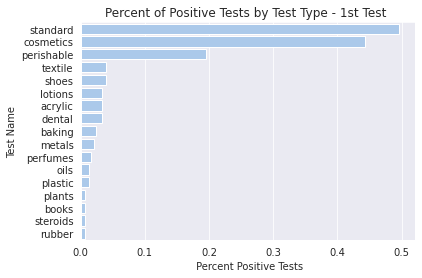

In [234]:
import numpy as np
g=sns.barplot(y='testtype', x='percent_positive',color="b", data=pos_sorted)
g.set(xlabel= " Percent Positive Tests",ylabel='Test Name')
g.set_title('Percent of Positive Tests by Test Type - 1st Test ')
plt.show()

In [235]:
len_table

,standard_0_before,standard_1_before,standard_2_before,standard_3_before,perishable_0_before,perishable_1_before,perishable_2_before,perishable_3_before,cosmetics_0_before,cosmetics_1_before,...,oils_3_before,metals_0_before,metals_1_before,metals_2_before,metals_3_before,plastic_0_before,plastic_1_before,plastic_2_before,plastic_3_before,PatientID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38722203
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21717335
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32028628
3,2,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,38722203
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,21717335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,27088012
294,4,1,0,0,0,1,0,0,2,1,...,0,0,0,0,0,0,0,0,0,59643726
295,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,307777995
296,1,2,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,204425276


## time course

In [276]:
time_dataframe=after_splitted
time_dataframe['PatientID']=data['PatientID'].values
time_dataframe['month']=data.month


In [277]:
time_dataframe.iloc[103].year='17'
time_dataframe.iloc[103].month='11'
time_dataframe.iloc[102].year='17'
time_dataframe.iloc[102].month='11'

In [307]:
missing_years=time_dataframe[time_dataframe.year=='nan']
missing_months=time_dataframe[time_dataframe.month=='nan']
missing_months_n=time_dataframe[time_dataframe.month.isna()]

In [313]:
for index in missing_years.index:
    time_dataframe.iloc[index].year=time_dataframe.iloc[index-1].year
    
for index in missing_months.index:
    time_dataframe.iloc[index].month=time_dataframe.iloc[index-1].month
    
for index in missing_months_n.index:
    time_dataframe.iloc[index].month=time_dataframe.iloc[index-1].month

In [374]:
time_dataframe=time_dataframe.replace({'7': '07','8': '08','9': '09','1': '01','2': '02','3': '03','4': '04','5': '05','6': '06'})

In [394]:
time_dataframe['date']=time_dataframe.month+'/'+time_dataframe.year

In [395]:
time_dataframe['date']

0      07/17
1      07/17
2      07/17
3      07/17
4      07/17
       ...  
293    06/18
294    06/18
295    06/18
296    06/18
297    06/18
Name: date, Length: 298, dtype: object

In [396]:
time_dataframe['date']=pd.to_datetime(time_dataframe['date'], format='%m/%y')
time_df=time_dataframe[['PatientID','date']]

In [397]:
time_dataframe['date']

0     2017-07-01
1     2017-07-01
2     2017-07-01
3     2017-07-01
4     2017-07-01
         ...    
293   2018-06-01
294   2018-06-01
295   2018-06-01
296   2018-06-01
297   2018-06-01
Name: date, Length: 298, dtype: datetime64[ns]

In [399]:
len_table=time_dataframe.applymap(count_len)
len_table['PatientID']=data['PatientID'].values

patient_counts=pd.DataFrame(columns=['patient_id','test_type', 'count'])

for testtype in test_columns:
    test_cols=[col for col in time_dataframe if col.startswith(testtype) ]
    test_table=len_table[test_cols]
    sums=test_table.sum(axis=1)
    new_table=pd.DataFrame({
    'test_type':testtype,
    'count':sums,
    'patient_id': len_table.PatientID
    })
    patient_counts=pd.concat([patient_counts,new_table], axis=0)
    
patient_counts['boolean']=patient_counts.apply (lambda row: label(row), axis=1)

In [400]:
final_time_df=patient.merge(time_df,left_on='patient_id', right_on='PatientID', how='left')

In [404]:
final_time_df['pat']=1
final_time_df.head()

,patient_id,count,boolean,PatientID,date,pat
0,312465313,0,0,312465313,2017-09-01,1
1,315944884,0,0,315944884,2017-07-01,1
2,23890023,0,0,23890023,2017-09-01,1
3,316280304,0,0,316280304,2018-04-01,1
4,23540024,0,0,23540024,2018-02-01,1


In [407]:
g=final_time_df.groupby(pd.Grouper(key='date', freq='M')).sum()
g

,count,boolean,pat
date,,,
2017-07-31,107,26,34
2017-08-31,11,3,6
2017-09-30,38,12,17
2017-10-31,39,10,18
2017-11-30,215,34,51
2017-12-31,172,33,41
2018-01-31,90,25,29
2018-02-28,59,12,18
2018-03-31,90,19,29


In [411]:
g['propotion']=g.boolean/g.pat
g

,count,boolean,pat,propotion
date,,,,
2017-07-31,107,26,34,0.764706
2017-08-31,11,3,6,0.500000
2017-09-30,38,12,17,0.705882
2017-10-31,39,10,18,0.555556
2017-11-30,215,34,51,0.666667
2017-12-31,172,33,41,0.804878
2018-01-31,90,25,29,0.862069
2018-02-28,59,12,18,0.666667
2018-03-31,90,19,29,0.655172


(array([736541., 736572., 736602., 736633., 736663., 736694., 736725.,
        736753., 736784., 736814., 736845., 736875.]),
 <a list of 12 Text major ticklabel objects>)

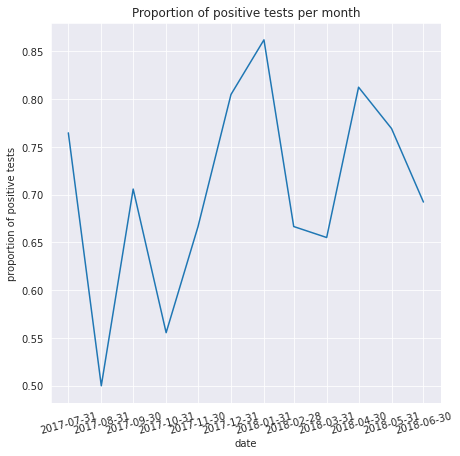

In [433]:

fig, ax = plt.subplots(figsize=(7,7))

sns.lineplot(x=g.index, y=g.propotion).set_title('Proportion of positive tests per month')

ax.set(xticks=g.index.values)
ax.set( ylabel='proportion of positive tests')

plt.xticks(rotation=15)


(array([736541., 736572., 736602., 736633., 736663., 736694., 736725.,
        736753., 736784., 736814., 736845., 736875.]),
 <a list of 12 Text major ticklabel objects>)

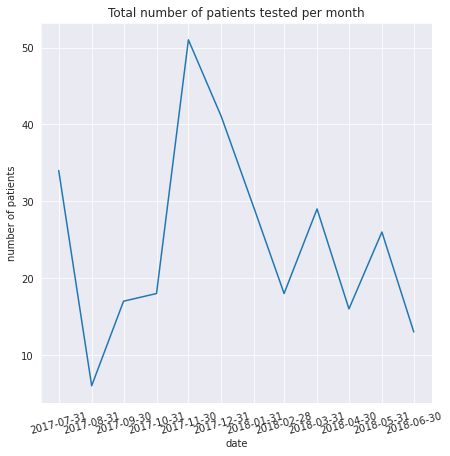

In [434]:

fig, ax = plt.subplots(figsize=(7,7))

sns.lineplot(x=g.index, y=g.pat).set_title('Total number of patients tested per month')

ax.set(xticks=g.index.values)
ax.set( ylabel='number of patients')

plt.xticks(rotation=15)
